In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')   # set seaborn scheme
sns.set(font_scale=2.5)    # set seaborn font_scale at once

# ignore warmings
import warnings
warnings.filterwarnings('ignore')

# show plot inline
%matplotlib inline

pd.set_option('max_colwidth', 100)    # max column width
# pd.options.display.max_rows = 999   # max row

# Overall Process
 - [01] Dataset 
 - [02] Exploratory Data Analysis
 - [03] Feature Engineering
 - [04] Modeling
 - [05] Training & Prediction
 - [06] Evaluation

# [01] Dataset

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 'How to Check' Null value

#### (1) by code

In [5]:
for col in df_train.columns :
    msg = 'column: {:>10}\t Pearcent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Pearcent of NaN value: 0.00%
column:   Survived	 Pearcent of NaN value: 0.00%
column:     Pclass	 Pearcent of NaN value: 0.00%
column:       Name	 Pearcent of NaN value: 0.00%
column:        Sex	 Pearcent of NaN value: 0.00%
column:        Age	 Pearcent of NaN value: 19.87%
column:      SibSp	 Pearcent of NaN value: 0.00%
column:      Parch	 Pearcent of NaN value: 0.00%
column:     Ticket	 Pearcent of NaN value: 0.00%
column:       Fare	 Pearcent of NaN value: 0.00%
column:      Cabin	 Pearcent of NaN value: 77.10%
column:   Embarked	 Pearcent of NaN value: 0.22%


In [6]:
for col in df_test.columns : 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


#### (2) using 'missingno' package

In [7]:
import missingno as msno

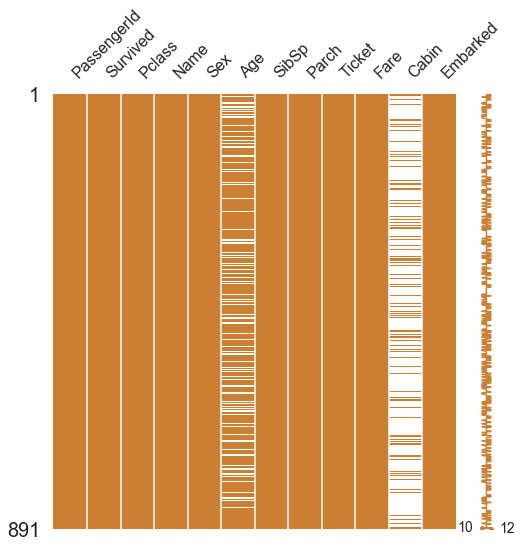

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

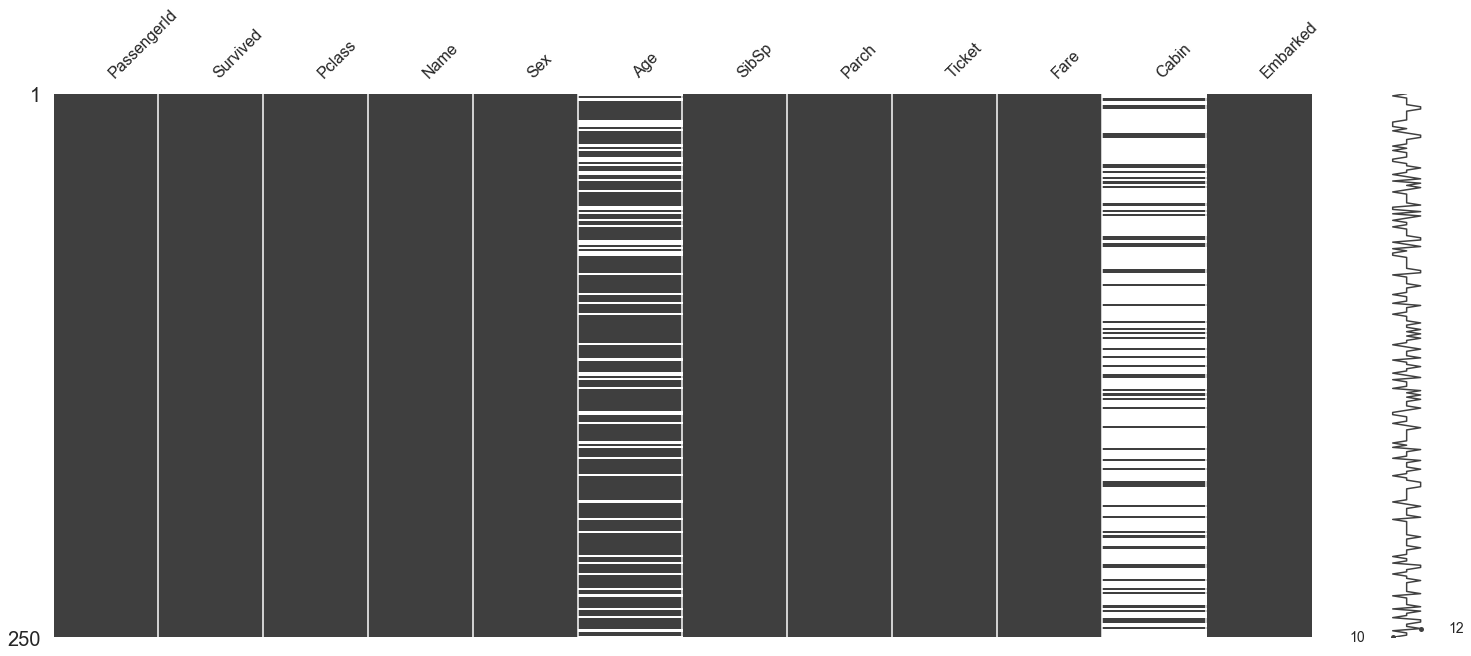

In [9]:
msno.matrix(df_train.sample(250))

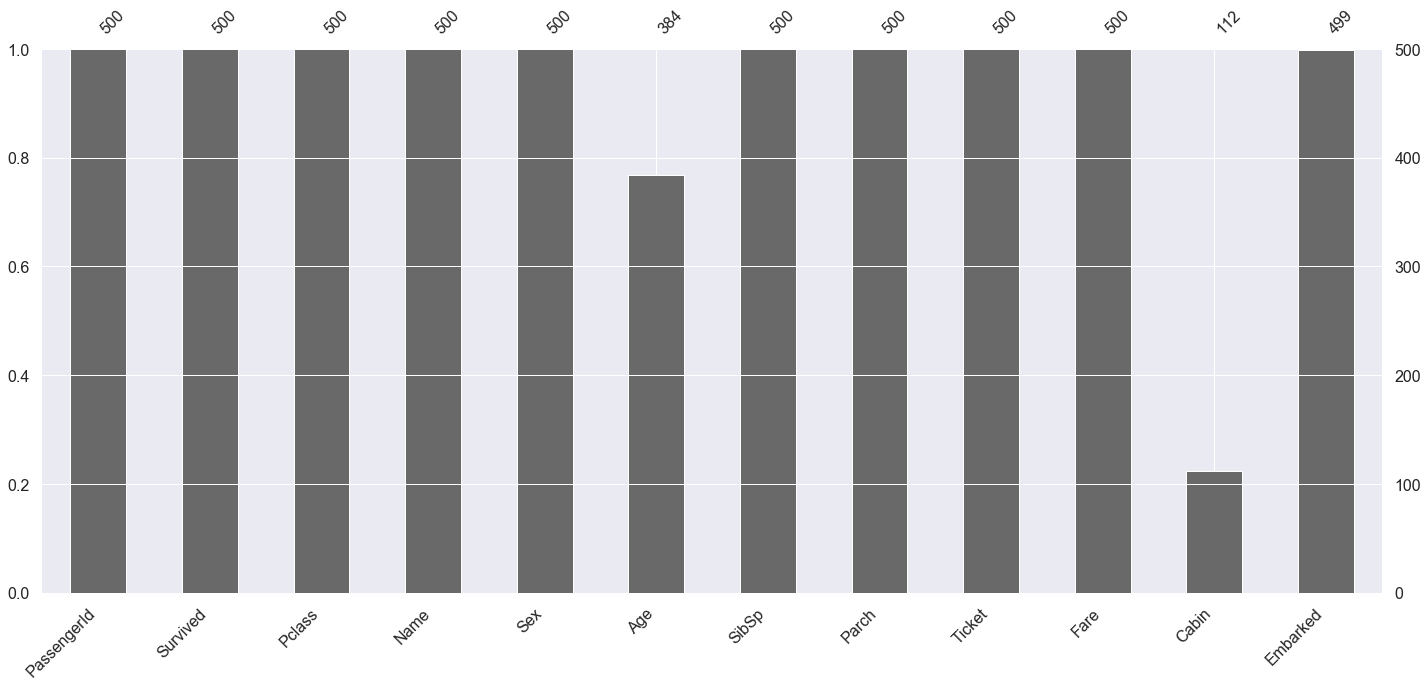

In [10]:
msno.bar(df_train.sample(500))

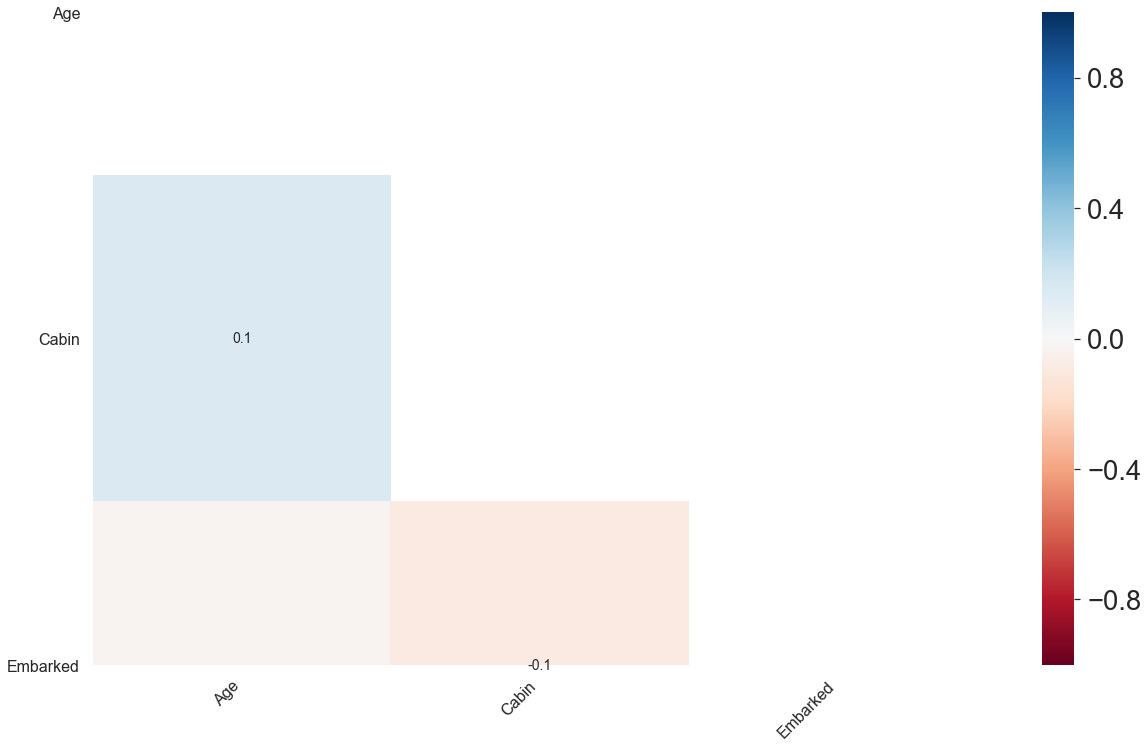

In [11]:
msno.heatmap(df_train)

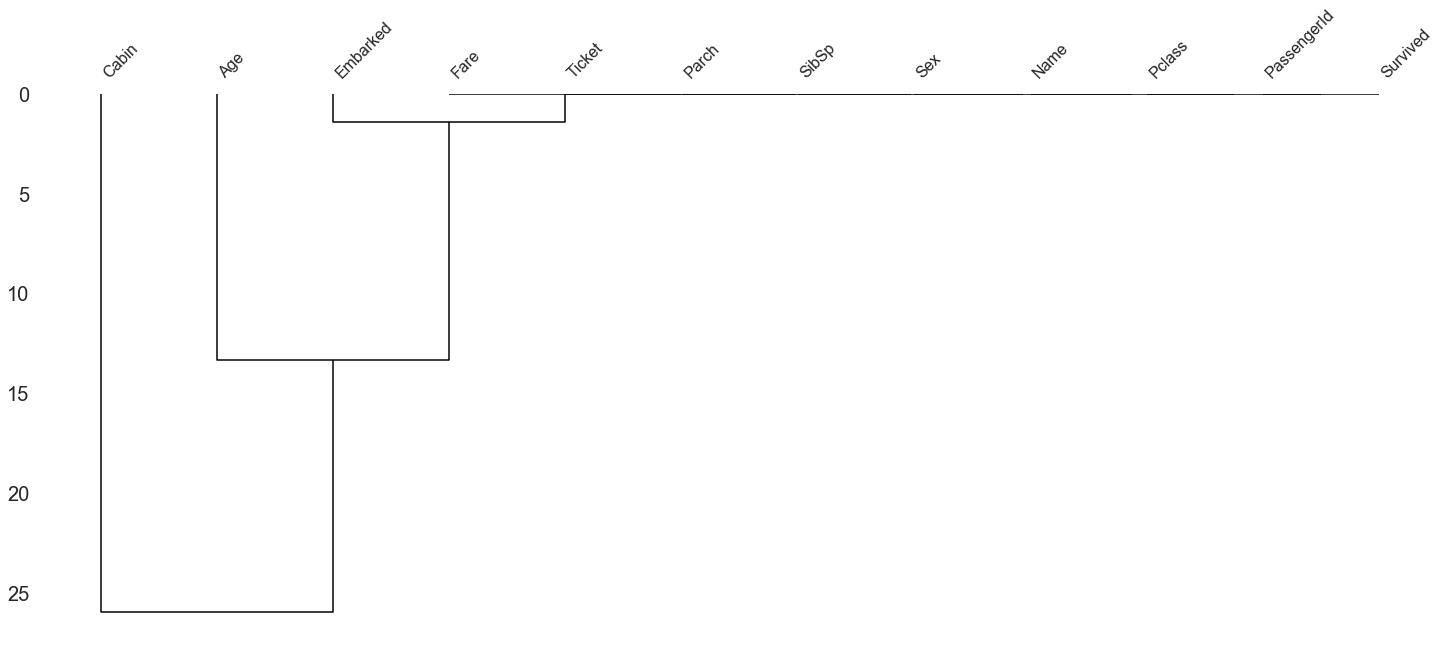

In [12]:
msno.dendrogram(df_train)

#### (3) using seaborn package

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

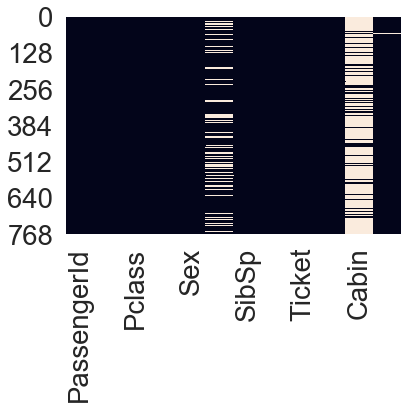

In [20]:
sns.heatmap(df_train.isnull(), cbar=False)

## 'Check' Null value

In [21]:
import missingno as msno

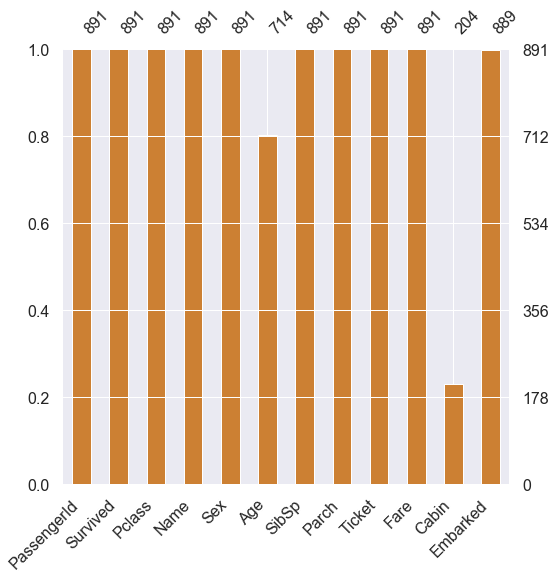

In [22]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

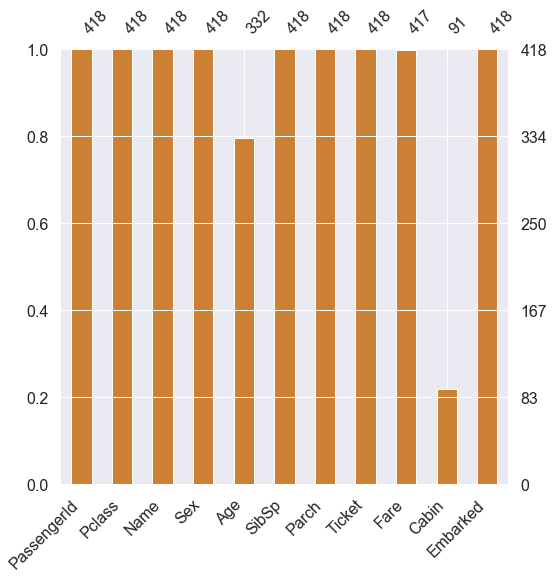

In [23]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

## Check Target Label
 - check the distribution of target label
 - ex) In Binary classification, evaluation metric can be differ according to the distribution of 0 and 1.

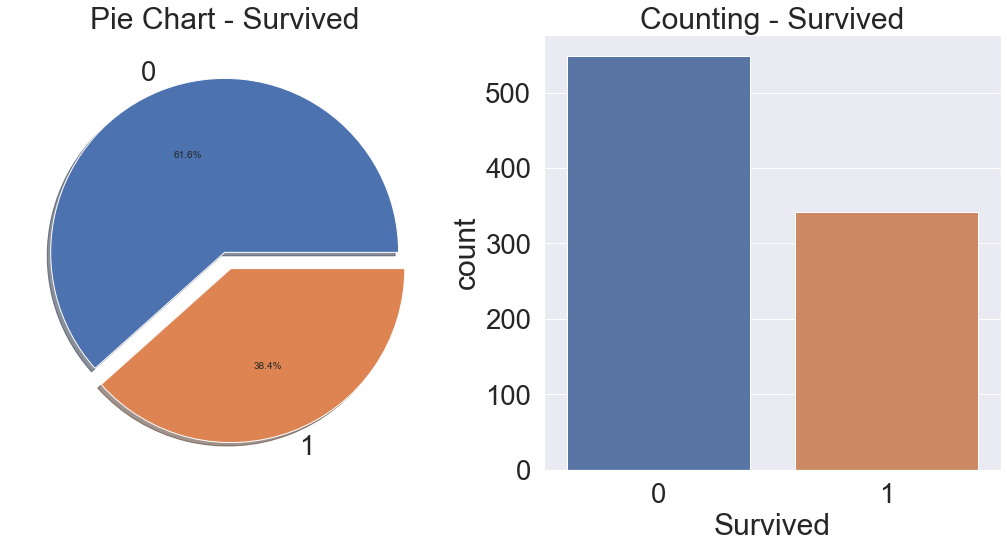

In [24]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1]
                                             , autopct='%1.1f%%'
                                             , ax=ax[0], shadow=True)
ax[0].set_title('Pie Chart - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Counting - Survived')

plt.show()

# [02] EDA
 - Exploratory Data Analysis

In [25]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


### [feature.01] Pclass

In [26]:
df_train[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [27]:
df_train.shape

(891, 12)

In [28]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [29]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


-> Among passengers in Pclass 1, 136 people survived  
-> Among passengers in Pclass 2, 87 people survived  
-> Among passengers in Pclass 3, 119 people survived  

In [30]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


-> survival rate per Pclass

In [31]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [32]:
pd.crosstab(df_train['Pclass'],
            df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


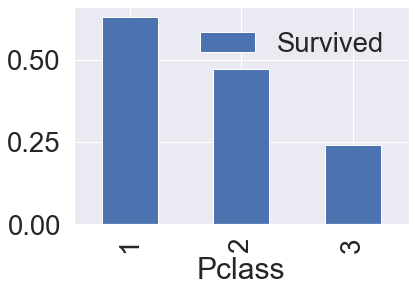

In [33]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

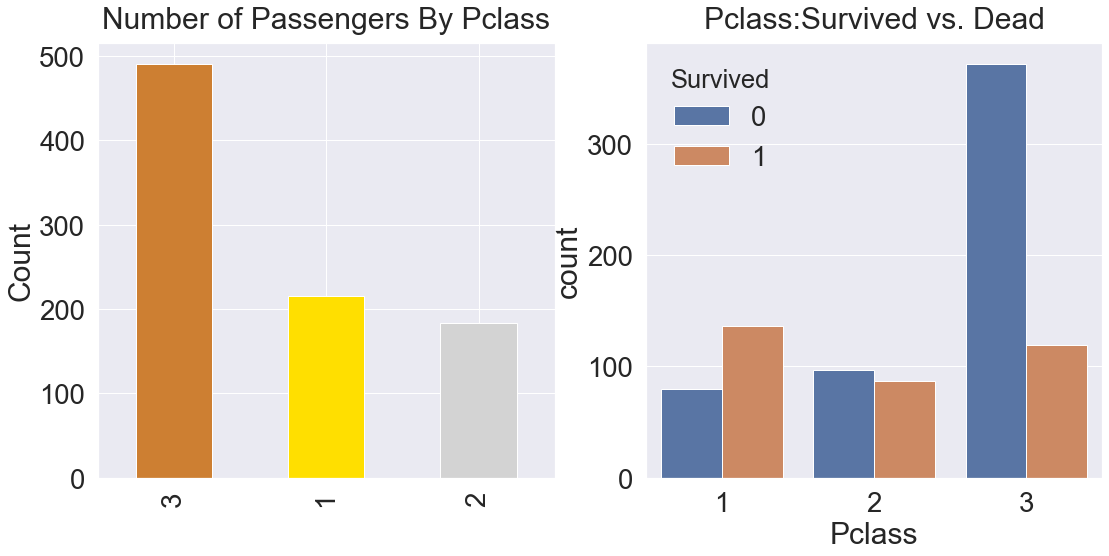

In [34]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs. Dead', y=y_position)

plt.show()

-> the better the Pclass, the more people are alive  
-> Pclass is good feature to predict 'Survival'  

### [feature.02] Sex

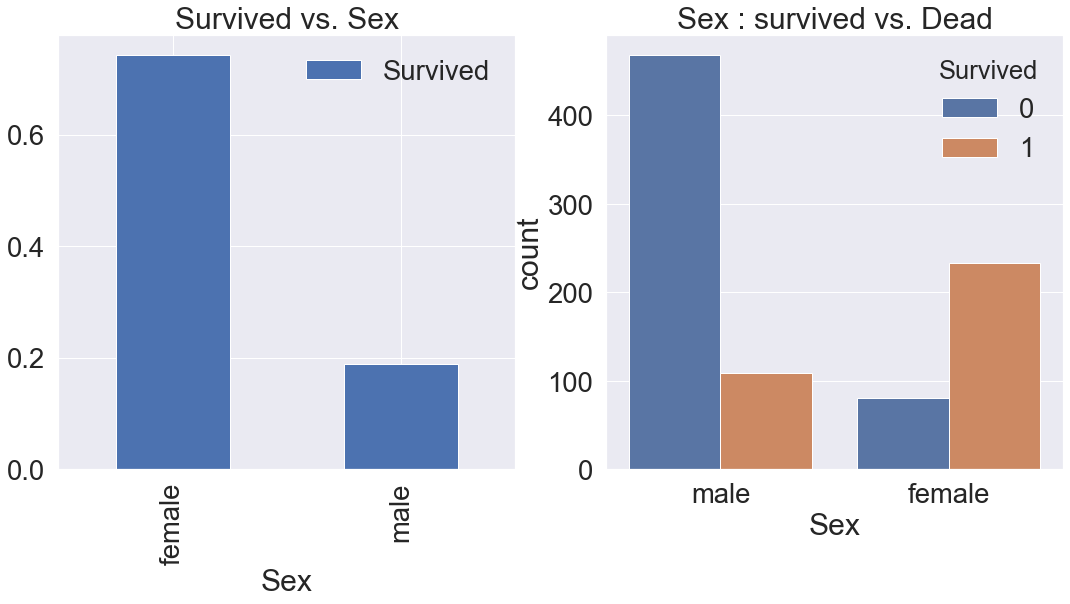

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : survived vs. Dead')

plt.show()

-> women seems to be more likely to survive rather than men

In [36]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [37]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [38]:
pd.crosstab(df_train['Sex']
            , df_train['Survived']
            , margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


-> sex is good feature to predict 'Survival'

### [feature.(+a)] Both Pclass & Sex

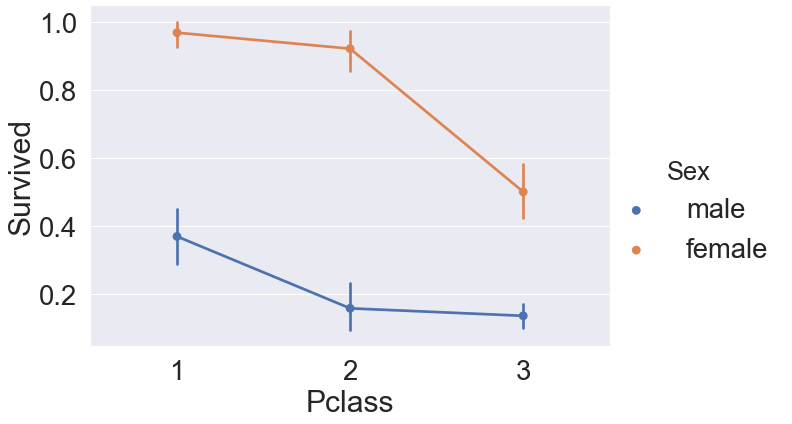

In [39]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

### [feature.03] Age

In [40]:
print('the oldest : {:.1f} Years'.format(df_train['Age'].max()))
print('the youngest : {:.1f} Years'.format(df_train['Age'].min()))
print('mean age of all passengers : {:.1f} Years'.format(df_train['Age'].mean()))

the oldest : 80.0 Years
the youngest : 0.4 Years
mean age of all passengers : 29.7 Years


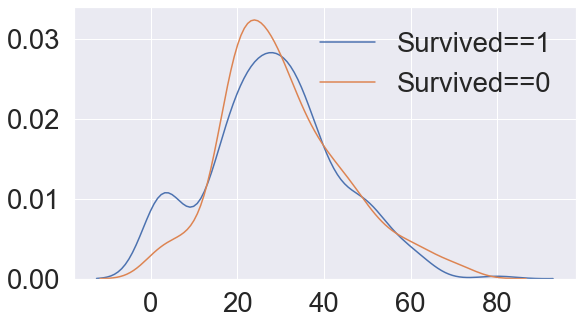

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived==1', 'Survived==0'])
plt.show()

-> when young, more likely to survive

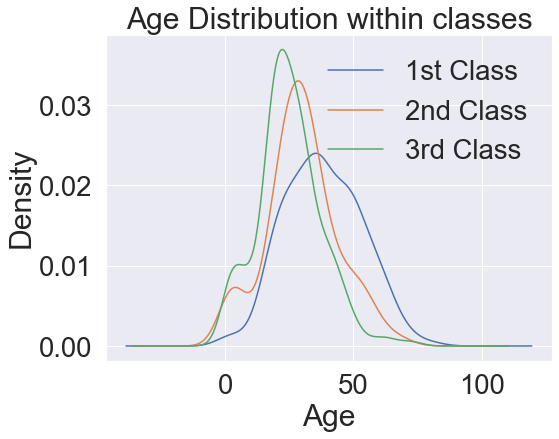

In [42]:
plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

-> the elder, the more number of 1st Class

### [feature.(+b)] Pclass & Sex & Age

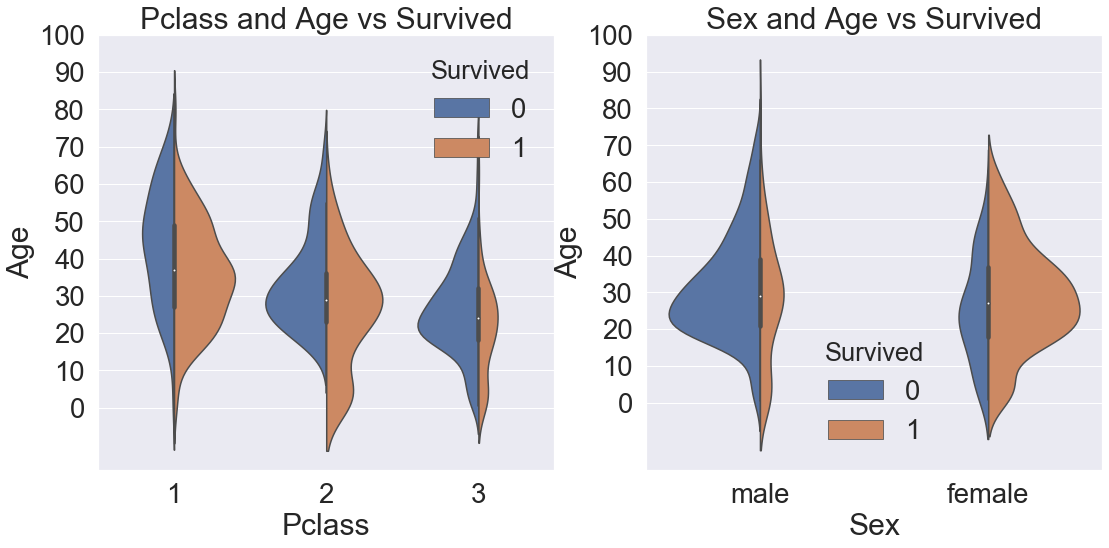

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

-> (left graph) : Within all Pclasses, the younger the more survived  
-> (right graph) : Obviousely, women survived more than men  

### [feature.04] Embarked
 - Embarked : the harbor that passenger boarded on

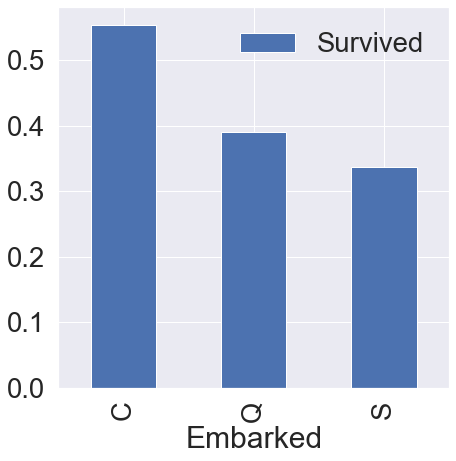

In [44]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

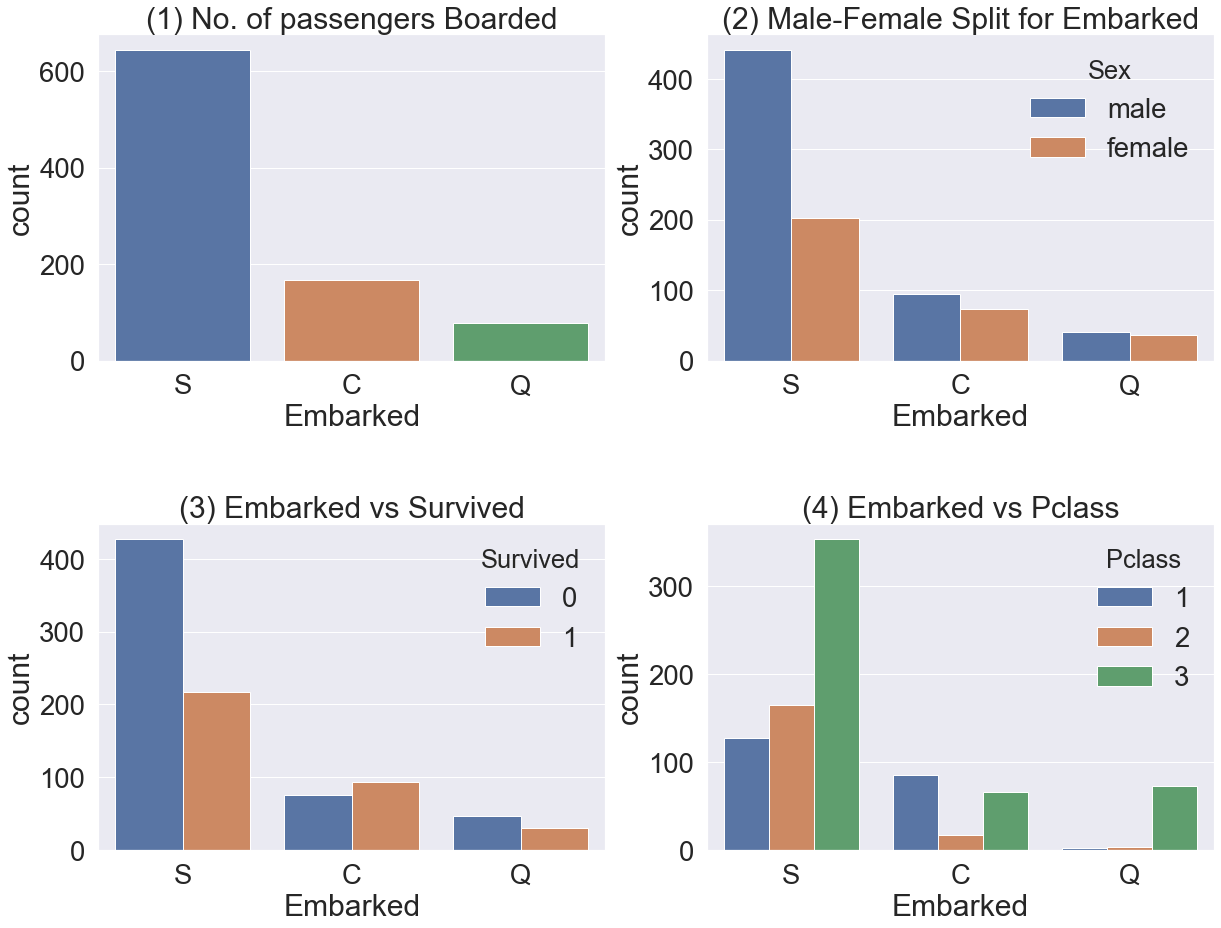

In [45]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0]) 
ax[0,0].set_title('(1) No. of passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0]) 
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

-> (1) Overall, most people went aboard at S  
-> (2) At S, more women went aboard, while other 2 are similar regardless of sex  
-> (3) Survival rate is very small at S  
-> (4) When split into Pclass, we can see...  
.....<1> At S, many people with Pclass 3 went aboard, so the survival rate is low.  
.....<2> At C, many people with Pclass 1 went aboard, so the survival rate is high.

### [feature.05] About Family : SibSp & Parch
 - Embarked : the harbor that passenger boarded on

In [47]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1